# Algoritmos

## Algoritmo IDE3


### Requisitos
Para el correcto funcionamiento del algoritmo será necesario instalar la librería networkx:

In [ ]:
pip install networkx

### Carga de datos
Cargaremos un fichero **.csv** con los datos necesarios para generar el arbol de decisión IDE3. La última columna del dataset será la seleccionada para determinar la clase a la que pertenece cada ejemplo.

In [1]:
import pandas as pd
dataset = pd.read_csv('examples_datasets/dataset_ide3_1.csv')
dataset

,Antenas,Colas,Núcleos,Cuerpo,Clase
0,1,0,2,Rayado,Normal
1,1,0,1,Blanco,Cancerígena
2,1,2,0,Rayado,Normal
3,0,2,1,Rayado,Normal
4,1,1,1,Rayado,Cancerígena
5,2,2,1,Rayado,Cancerígena


### Uso del algoritmo
Importa la clase **algoritmo** del modulo ide3. Llamamos al método **generate_tree()**, y le pasamos el dataset previamente cargado para generar el árbol. Además, especificaremos si queremos mostrar todos los cálculos realizados por el algoritmo:

In [2]:
from algorithms import ide3
alg = ide3.algorithm()
show = True
alg.generate_tree(dataset, show)

========== Decision Table 1 ==========
----------------------------------------------
|  Antenas Colas Núcleos  Cuerpo        Clase|
----------------------------------------------
|0       1     0       2  Rayado       Normal|
|1       1     0       1  Blanco  Cancerígena|
|2       1     2       0  Rayado       Normal|
|3       0     2       1  Rayado       Normal|
|4       1     1       1  Rayado  Cancerígena|
|5       2     2       1  Rayado  Cancerígena|
----------------------------------------------
We must calculate earnings of all attributes from table 1
I(Antenas) = I_1  + I_0 + I_2
I(Antenas) --------------------------------
	Entropy Attribute value: 1 - We must calculate his entropy
	I_1_Normal = (-1)*(2/4)*log2(2/4) = 0.5
	I_1_Cancerígena = (-1)*(2/4)*log2(2/4) = 0.5
	I_1 = I_1_Normal + I_1_Cancerígena = 1.0
I(Antenas) = 0 + (4/6) * I_1 = 0 + 1.0 = 0.6667
	Entropy Attribute value: 0 - We must calculate his entropy
	I_0_Normal = (-1)*(1/1)*log2(1/1) = -0.0
	I_0_Cancerígena = (

Podemos representar el árbol de decisión invocando al método **draw_tree()** de la clase.

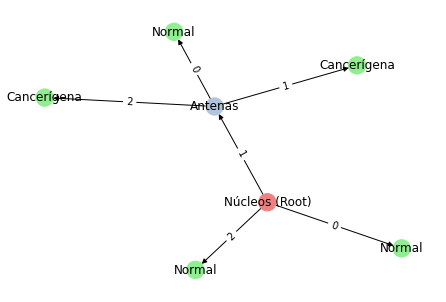

In [3]:
alg.draw_tree()

Para clasificar nuevos ejemplos, cargamos un nuevo dataset que solo contengan los atributos utilizados para generar el árbol de decisión (en este ejemplo, el atributo 'Clase').

In [4]:
dataset_test = pd.read_csv('examples_datasets/dataset_ide3_test.csv')
dataset_test

,Antenas,Colas,Núcleos,Cuerpo
0,1,0,2,Rayado
1,1,1,1,Blanco
2,1,2,0,Blanco
3,0,1,1,Rayado


Ahora, utilizamos el método **predict()** de la clase para clasificar los nuevos ejemplos.

In [5]:
alg.predict(dataset_test)

,Antenas,Colas,Núcleos,Cuerpo,Clase
0,1,0,2,Rayado,Normal
1,1,1,1,Blanco,Cancerígena
2,1,2,0,Blanco,Normal
3,0,1,1,Rayado,Normal
